<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Afif Ahmed Chaudhury
* **UCID** = 30158781
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [1]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
rm: cannot remove 'seeds.zip': No such file or directory


In [7]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv("C:\\Users\\Owner\\Downloads\\seeds_dataset.txt", sep='\s+', header=None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

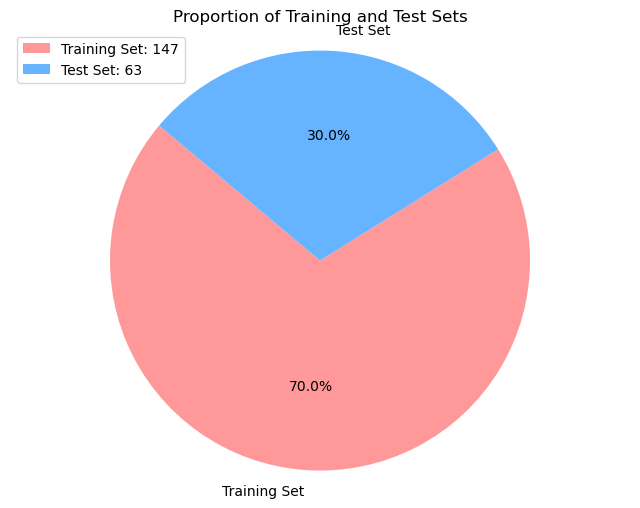

In [8]:
# 1.1
# Add necessary code here.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = data.drop('Type', axis=1)
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_size = len(X_train)
test_size = len(X_test)
sizes = [train_size, test_size]
labels = ['Training Set', 'Test Set']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Proportion of Training and Test Sets')
plt.legend(labels=[f'{labels[0]}: {train_size}', f'{labels[1]}: {test_size}'], loc='upper left')

plt.show()


<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2** .....................

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [9]:
# 1.3
# Add necessary code here.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data.drop('Type', axis=1)
y = data['Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.86      0.90      0.88        21
           3       0.87      0.95      0.91        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63

KNN Accuracy: 0.873015873015873
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.86      0.90      0.88        21
           3       0.91      0.95      0.93        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

SVM Accuracy: 0.8412698412698413
              precision    recall  f1-score   support

           1       0.74      0.81      0.77        21
           2   

<font color='Green'><b>Answer:</b></font>

- **1.3** .....................
I recommend K-Nearest Neighbors as the optimum model due to their simplicity and effectiveness in handling small datasets. Afterward, I experimented with more complex models like Logistic Regression, Support Vector Machines and Random Forests to see if they offer significant improvements in predictive performance and saw that KNN is the best model with the highest accuracy.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [10]:
# 1.4
# Add necessary code here.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Define the parameter grid
parameter_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'svm__kernel': ['rbf', 'poly', 'sigmoid']  # Type of SVM kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Best estimator
best_clf = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best cross-validated score: 0.9595402298850575
Accuracy on test set: 0.873015873015873
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



<font color='Green'><b>Answer:</b></font>

- **1.4** .....................

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [11]:
# 1.5
# Add necessary code here.
from sklearn.decomposition import PCA

# Initialize PCA and reduce the dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Define a new grid search using the same parameter grid as before
grid_search_pca = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the reduced data
grid_search_pca.fit(X_train_pca, y_train)

# Print the best parameters and the best score for the reduced data
print("Best parameters found (PCA):", grid_search_pca.best_params_)
print("Best cross-validated score (PCA):", grid_search_pca.best_score_)

# Best estimator for reduced data
best_clf_pca = grid_search_pca.best_estimator_

# Predict and evaluate the model on the reduced test set
y_pred_pca = best_clf_pca.predict(X_test_pca)
print("Accuracy on test set (PCA):", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found (PCA): {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best cross-validated score (PCA): 0.925287356321839
Accuracy on test set (PCA): 0.8571428571428571
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.86      0.90      0.88        21
           3       0.87      0.95      0.91        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63



<font color='Green'><b>Answer:</b></font>

- **1.5** .....................
Given the relatively small size of the seeds dataset and linear relationships between features, PCA would be a suitable and efficient choice for reducing the dataset to two dimensions. It will facilitate a faster grid search in the subsequent steps and is less likely to introduce the kind of distortions in data representation that t-SNE might.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

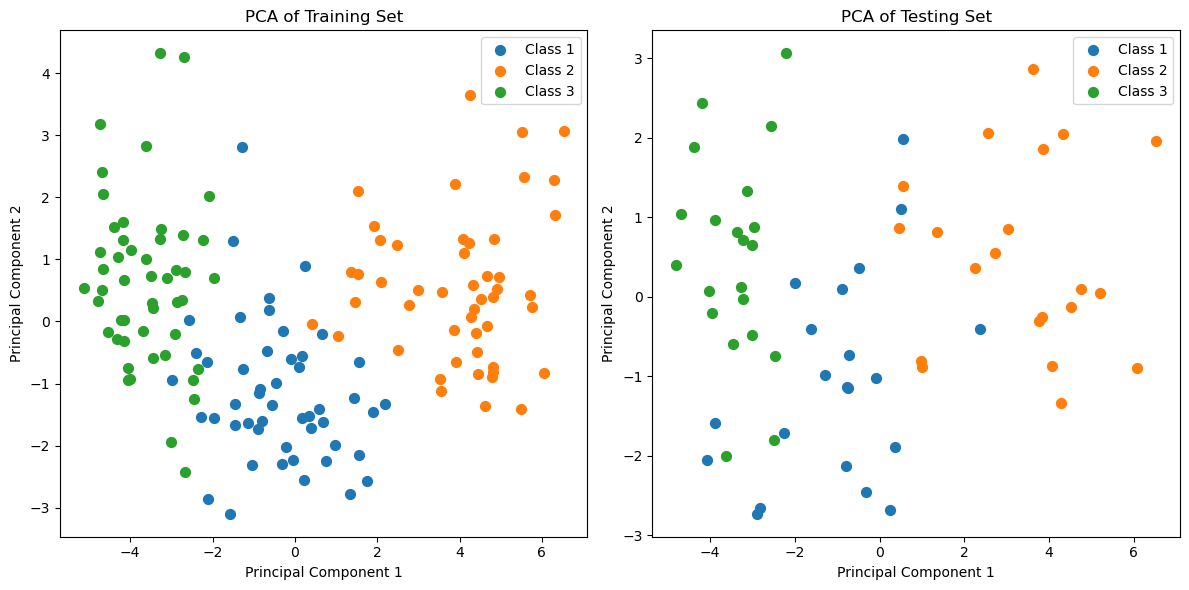

In [13]:
# 1.6
# Add necessary code here.
import matplotlib.pyplot as plt
import numpy as np
# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for the training set
for class_value in range(1, 4):  
    ix = np.where(y_train == class_value)
    ax[0].scatter(X_train_pca[ix, 0], X_train_pca[ix, 1], label=f"Class {class_value}", s=50)
ax[0].set_title('PCA of Training Set')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].legend()

# Scatter plot for the testing set
for class_value in range(1, 4):
    ix = np.where(y_test == class_value)
    ax[1].scatter(X_test_pca[ix, 0], X_test_pca[ix, 1], label=f"Class {class_value}", s=50)
ax[1].set_title('PCA of Testing Set')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].legend()

plt.tight_layout()
plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

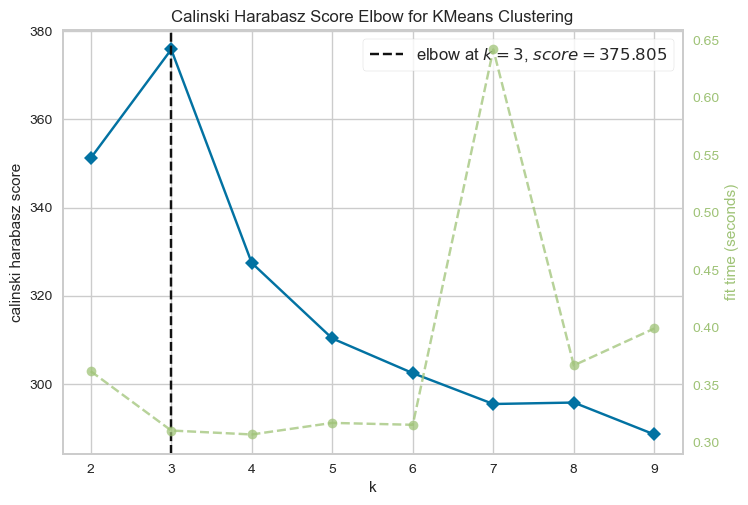

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [14]:
# 2.1
# Add necessary code here.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer

# Setting up the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Using KelbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=(2,10), metric='calinski_harabasz')
visualizer.fit(X) 
visualizer.show()


<font color='Green'><b>Answer:</b></font>

- **2.1** .....................

The Kelbow Visualizer indicates that the optimal number of clusters for the dataset is 3, as this is the point where the Calinski-Harabasz score starts to level off, showing further increases in k do not significantly improve the cluster separation.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [15]:
# 2.2
# Add necessary code here.
optimal_k = visualizer.elbow_value_

# Update the pipeline with the optimal number of clusters
pipeline.set_params(kmeans__n_clusters=optimal_k)

# Fit the pipeline to the training data and predict the cluster labels
pipeline.fit(X_train)
cluster_labels = pipeline.predict(X_train)



c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [16]:
# 2.3
# Add necessary code here.
from sklearn.decomposition import PCA

# Initialize PCA, setting the number of components to 2
pca = PCA(n_components=2)

# Fit PCA on the dataset and transform the data
X_pca = pca.fit_transform(X)


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Owner\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


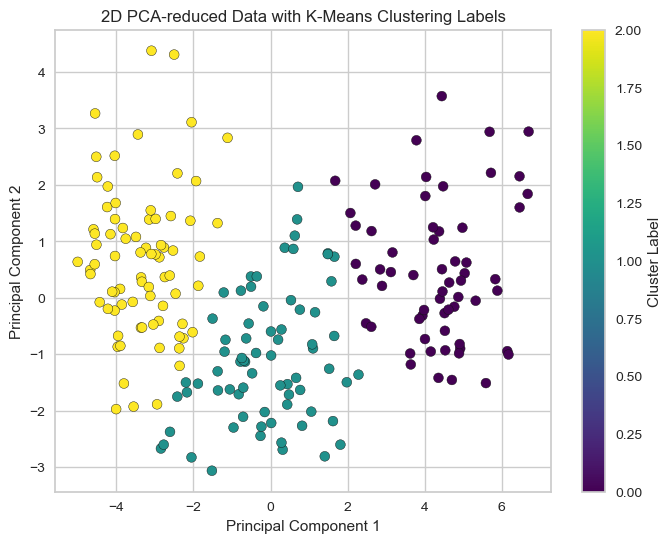

In [18]:
# 2.4
# Add necessary code here.

# Apply PCA to reduce the dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-Means clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA-reduced Data with K-Means Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** .....................
 The 2D PCA scatter plot reveals that the K-Means algorithm has effectively partitioned the data into three well-defined clusters with clear boundaries and minimal overlap, suggesting a strong group differentiation. Each cluster occupies a distinct region of the plot, implying that the underlying features captured by PCA contribute to meaningful separations. While there are some data points near the edges of clusters that could be considered marginal, the overall pattern indicates a successful clustering.